In [28]:
import math
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
import time
from sklearn.utils.class_weight import compute_class_weight

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))
from Models.Transformers.Embeddings import *
from Models.Transformers.tAPETransformer.model import *
from src.Preprocessing.DataImport import *
from src.Preprocessing.Preprocessing import *
from src.Training.Transformers.train import *
from src.Evaluation.Transformers.evaluate import *
from Models.Transformers.RegularTransformer.model import *


# Baseline Architecture

The proposed architecture is a streamlined Transformer model designed for time-series classification tasks. It features a positional encoding layer that maps input data to a high-dimensional space (d_model = 64) while incorporating normalization and dropout to improve convergence and generalization. The core of the model is a Transformer encoder, built with two layers and four attention heads per layer, enabling it to capture intricate temporal dependencies and relationships within the input sequence. The classification head employs a lightweight feedforward network, combining a reduced hidden dimension and non-linear activation to transform the encoded features into class predictions. The architecture is intentionally minimalistic, focusing on efficiency and interpretability while maintaining sufficient capacity to model complex time-series data. Regularization techniques, such as dropout and weight decay, are employed to enhance robustness, making the model a strong candidate for practical applications and baseline comparisons.

![Image description](../../images/Transformer_Architecture.png)

In [ ]:
# Definition of the method that performs our main experiment (7 days training + 3 days of testing on multiple horizons k={10,20,50,100})
def benchmark(combined_data, model, config,model_name):
    horizons = [10,20,50,100]
    results = []

    for horizon in horizons:
        print(f"\nEvaluating model with horizon: {horizon}")

        # Generate dataset with the correct horizon
        current_data = feature_engineering_and_labels_generation(combined_data,horizon)

        # Load and split data
        train_data, test_data = split_data(current_data, train_size=0.7)
        print("The number of data points in the testing set is:",len(test_data))

        # Train Model on chunks
          # We use a subset of the testing set as validation
            # Determine the maximum starting index (so we don't exceed the DataFrame length)
        max_start_index = len(test_data) - 500000
            # Randomly choose a starting index
        start_idx = np.random.randint(0, max_start_index)
            # Select the consecutive 500000 rows starting from the chosen index
        test_data_subset = test_data[start_idx:start_idx + 500000]
          # Training
        model = train_model_in_chunks(model, train_data, test_data_subset, config, chunk_size=500000)

        # Save the model
        model_name = model_name+f"{horizon}_horizon_transformer.pth"
        torch.save(model.state_dict(), f"../Pretrained/Transformer/{model_name}")

        # Evaluate the model
        final_metrics = evaluate_model_in_chunks(model, test_data, config, chunk_size=500000)
        final_metrics['Horizon'] = horizon
        results.append(final_metrics)

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    print("\nFinal Results:")
    print(results_df)

In [ ]:
# Data Retrieval
combined_data = import_data()

# Configuration
config = TrainingConfig(combined_data)

# We set the sequence length at 10 (common choice in LOB data experiences)
config.seq_len = 10

# Definition of the baseline transformer model
model = TimeSeriesTransformerWrapper(
            input_dim=config.input_dim,
            seq_len=config.seq_len,
            num_classes=config.num_classes
            ).to(config.device)

# Results time!
benchmark(combined_data, model, config,"baseline_transformer")


Evaluating model with horizon: 10


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(



Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished

Training on chunk 12 finished

Training on chunk 13 finished
Epoch [1/2]
Train Loss: 0.0018, Accuracy: 96.73%
Val Loss: 0.0027, Accuracy: 94.51%

Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished

Training on chunk 12 finished

Training on chunk 13 finished
Epoch [2/2]
Train Loss: 0.0016, Accuracy: 97.01%
Val Loss: 0.0027, A

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(



Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished

Training on chunk 12 finished

Training on chunk 13 finished
Epoch [1/2]
Train Loss: 0.0015, Accuracy: 97.39%
Val Loss: 0.0186, Accuracy: 72.11%

Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished

Training on chunk 12 finished

Training on chunk 13 finished
Epoch [2/2]
Train Loss: 0.0012, Accuracy: 97.93%
Val Loss: 0.0625, A

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(



Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished

Training on chunk 12 finished

Training on chunk 13 finished
Epoch [1/2]
Train Loss: 0.0023, Accuracy: 95.05%
Val Loss: 0.0662, Accuracy: 36.48%

Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished

Training on chunk 12 finished

Training on chunk 13 finished
Epoch [2/2]
Train Loss: 0.0017, Accuracy: 96.44%
Val Loss: 0.0644, A

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(



Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished

Training on chunk 12 finished

Training on chunk 13 finished
Epoch [1/2]
Train Loss: 0.0025, Accuracy: 94.07%
Val Loss: 0.0087, Accuracy: 73.49%

Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished

Training on chunk 12 finished

Training on chunk 13 finished
Epoch [2/2]
Train Loss: 0.0017, Accuracy: 96.16%
Val Loss: 0.0091, A

# Improving the embedding technique

A key area for improvement is the embedding layer. The baseline architecture does not incorporate advanced positional encoding, which is particularly useful for time series data. To address this, we explored three main methods: random/no particular positional encoding and a novel method introduced in 2023 for time series data called Time Absolute Position Encoding (tAPE).

In [ ]:
def prepare_benchmark_data(data, sequence_length=10, device="cuda"):
    
    # Remove non-feature columns
    features = [col for col in data.columns if col not in ['label', 'UpdateID', 'Timestamp']]
    X = data[features].values

    # Normalize features
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    std = np.where(std == 0, 1e-8, std)  # Avoid division by zero in case of constant features
    X_normalized = (X - mean) / std

    # Convert to PyTorch tensor and move to the GPU
    X_tensor = torch.tensor(X_normalized, dtype=torch.float32, device=device).unsqueeze(0)

    return X_tensor


Rather than simply training separate models to determine the best approach, we employ unsupervised learning techniques like t-SNE to visualize the embeddings in a low-dimensional space. This will allow us to assess whether the embeddings effectively capture temporal relationships in the data.

In [ ]:
def benchmark_embeddings(df, d_model=64, device="cuda"):
    
    # Prepare input data
    input_data = prepare_benchmark_data(df, device=device)
    input_dim = input_data.shape[2]  # Number of input features

    # Define embedding models, moved to GPU
    models = {
        'Linear Positional Encoder': LinearPositionalEncoder(input_dim, d_model).to(device),
        'Time-Adaptive PE': tAPE(input_dim=input_dim, d_model=d_model).to(device)
    }

    embeddings_results = {}

    # Compute embeddings
    for name, model in models.items():
        with torch.no_grad():
            embeddings = model(input_data)  # Embedding computation on GPU
        embeddings_results[name] = embeddings.cpu()  # Move back to CPU for further processing

        ## Visualization and Analysis using t-sne
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)

    for name, embeddings in embeddings_results.items():
        print(f"Current Model: {name}")
        # Squeeze out batch dimension for visualization
        embeddings_squeezed = embeddings.squeeze(0)
        embeddings_np = embeddings_squeezed.numpy()  # Convert to NumPy
        embeddings_2d = tsne.fit_transform(embeddings_np)  # GPU-accelerated t-SNE

        # Plot for each embedding method
        plt.figure(figsize=(9, 6))
        plt.scatter(
            embeddings_2d[:, 0], embeddings_2d[:, 1],
            c=np.arange(len(embeddings_2d)),  # Temporal sequence
            cmap='viridis', alpha=0.7
        )
        plt.colorbar(label='Temporal Sequence')  # Add color bar to represent time
        plt.title(f't-SNE Visualization of {name}')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.tight_layout()
        plt.show()

Current Model: Linear Positional Encoder


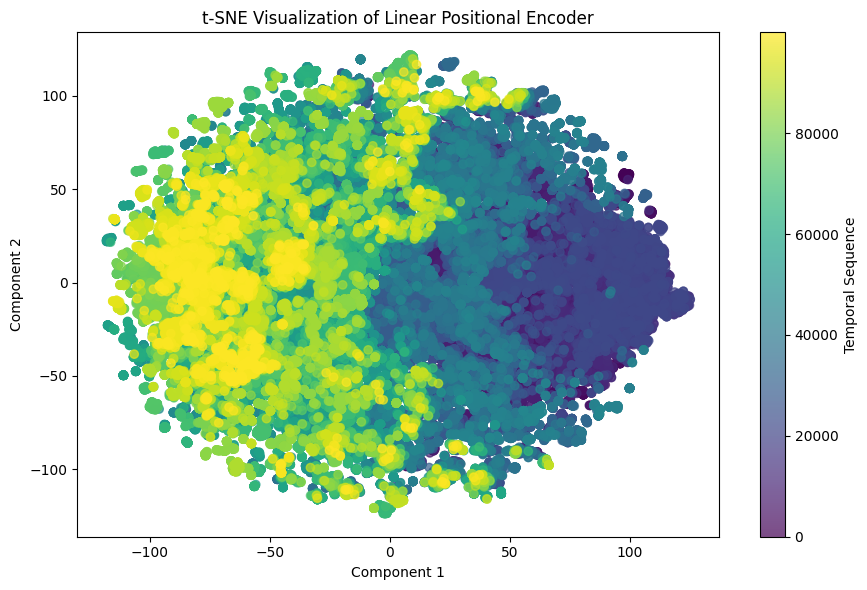

Current Model: Time-Adaptive PE


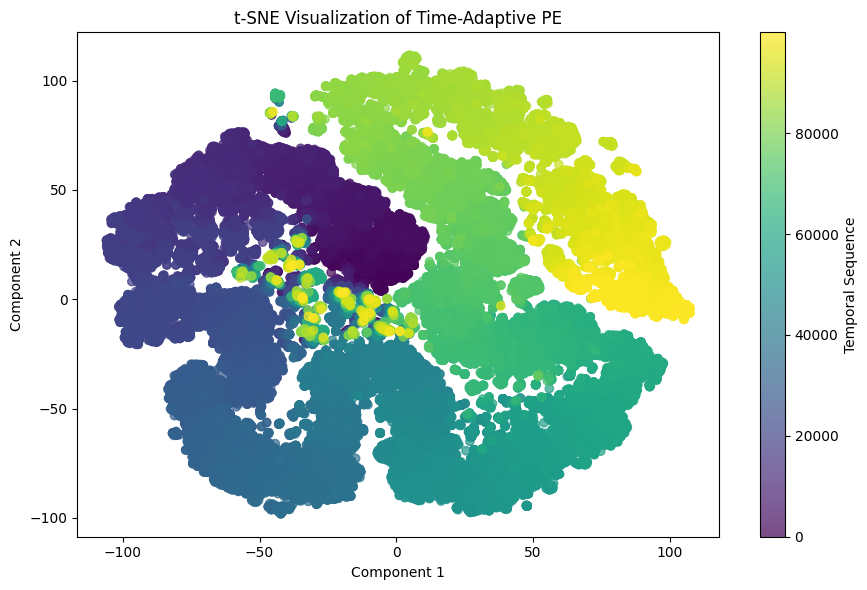

In [ ]:
# Perform Benchmark
df = pd.read_csv('../data/bid_ask_data_BTCUSDT_20241015.csv')
# Take a sample of the data since t-SNE's complexity is enormous
data = df[:100000]
embeddings_2d = benchmark_embeddings(data)

As shown in the figures, the tAPE method successfully captures temporal relationships, clustering close time frames together. This will likely enable the attention mechanism to identify relevant patterns more effectively compared to a simple projection. Let's test this hypothesis!

In [ ]:
# Data Retrieval
combined_data = import_data()

# Configuration
config = TrainingConfig(combined_data)

# We set the sequence length at 10 (common choice in LOB data experiences)
config.seq_len = 10

# Definition of the transformer model : We set the use_tape parameter to True
model = BiTranWrapper(
            input_dim=config.input_dim,
            seq_len=config.seq_len,
            num_classes=config.num_classes,
            use_tape=True
        ).to(config.device)

# Results time!
benchmark(combined_data, model, config,'tAPE')


Evaluating model with horizon: 10
2563905


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(



Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished
Epoch [1/2]
Train Loss: 0.0016, Accuracy: 97.29%
Val Loss: 0.0018, Accuracy: 96.98%

Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished
Epoch [2/2]
Train Loss: 0.0015, Accuracy: 97.50%
Val Loss: 0.0019, Accuracy: 97.06%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished

Evaluation on chunk 2 finished

Evaluation 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(



Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished
Epoch [1/2]
Train Loss: 0.0016, Accuracy: 97.21%
Val Loss: 0.0017, Accuracy: 97.06%

Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished
Epoch [2/2]
Train Loss: 0.0013, Accuracy: 97.67%
Val Loss: 0.0015, Accuracy: 97.44%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished

Evaluation on chunk 2 finished

Evaluation 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(



Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished
Epoch [1/2]
Train Loss: 0.0023, Accuracy: 94.91%
Val Loss: 0.0216, Accuracy: 55.16%

Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished
Epoch [2/2]
Train Loss: 0.0018, Accuracy: 96.32%
Val Loss: 0.0399, Accuracy: 48.54%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished

Evaluation on chunk 2 finished

Evaluation 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(



Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished
Epoch [1/2]
Train Loss: 0.0026, Accuracy: 93.88%
Val Loss: 0.0144, Accuracy: 59.36%

Training on chunk 0 finished

Training on chunk 1 finished

Training on chunk 2 finished

Training on chunk 3 finished

Training on chunk 4 finished

Training on chunk 5 finished

Training on chunk 6 finished

Training on chunk 7 finished

Training on chunk 8 finished

Training on chunk 9 finished

Training on chunk 10 finished

Training on chunk 11 finished
Epoch [2/2]
Train Loss: 0.0017, Accuracy: 96.15%
Val Loss: 0.0068, Accuracy: 84.16%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished

Evaluation on chunk 2 finished

Evaluation 

It is clear from the results that the chosen embedding technique improved performances a lot. Let's see if we can get even better results!

# Optimal number of attention heads

At this stage, we will be looking for the optimal number of attention heads using grid search while making sure the model's dimension divide this value!

We choose the horizon k=50 as our testing setup since it revealed itself as the horizon where our baseline architecture struggles the most!

In [ ]:
def grid_search_of_attention_heads():
    attention_heads = [1,2,4,8,16,32]
    results = []
    # Generate dataset with the correct horizon
    current_data = feature_engineering_and_labels_generation(combined_data, 51)

    for attention_head in attention_heads:
        print(f"\nEvaluating model with attention head: {attention_head}")

        # Configuration
        config = TrainingConfig(current_data)
        config.seq_len = 10
        config.num_epochs = 1

        # Load and split data
        train_data, test_data = split_data(current_data, train_size=0.7)
        print("The number of data points in the testing set is:", len(test_data))

        # Get class weights
        training_labels = train_data['label']
        class_weights = compute_class_weight(
            class_weight='balanced',
            classes=np.unique(training_labels),
            y=training_labels
        )

        # Convert class weights to tensor
        class_weights = torch.tensor(class_weights, dtype=torch.float).to(config.device)

        # Model Initialization
        model = BiTranWrapper(
            input_dim=config.input_dim,
            seq_len=config.seq_len,
            num_classes=config.num_classes,
            use_tape=True,
            n_heads=attention_head
        ).to(config.device)

        # Train Model on chunks
        # We use a subset of the testing set as validation
        max_start_index = len(test_data) - 500000
        start_idx = np.random.randint(0, max_start_index)
        test_data_subset = test_data[start_idx:start_idx + 500000]

        model = train_model_in_chunks(
            model, class_weights, train_data, test_data_subset, config, chunk_size=500000
        )

        # Evaluate the model
        final_metrics = evaluate_model_in_chunks(
            model, test_data, config, chunk_size=500000
        )
        final_metrics['Number of attention heads'] = attention_head
        results.append(final_metrics)

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    print("\nFinal Results:")
    print(results_df)

In [ ]:
# Results time!
grid_search_of_attention_heads()


Evaluating model with attention head: 1
The number of data points in the testing set is: 2563905


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(
<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 4 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 5 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 6 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 7 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 8 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 9 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 10 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 11 finished
Epoch [1/1]
Train Loss: 0.0030, Accuracy: 94.15%
Val Loss: 0.0037, Accuracy: 92.68%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished

Evaluation on chunk 2 finished

Evaluation on chunk 3 finished

Evaluation on chunk 4 finished

Evaluation on chunk 5 finished
Overall Accuracy: 87.62%
Overall F1 Score: 0.8773
Overall Recall: 0.8762
Overall Precision: 0.8803

Evaluating model with attention head: 2
The number of data points in the testing set is: 2563905


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 4 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 5 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 6 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 7 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 8 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 9 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 10 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 11 finished
Epoch [1/1]
Train Loss: 0.0028, Accuracy: 94.45%
Val Loss: 0.0069, Accuracy: 85.43%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished

Evaluation on chunk 2 finished

Evaluation on chunk 3 finished

Evaluation on chunk 4 finished

Evaluation on chunk 5 finished
Overall Accuracy: 81.70%
Overall F1 Score: 0.8208
Overall Recall: 0.8170
Overall Precision: 0.8298

Evaluating model with attention head: 4
The number of data points in the testing set is: 2563905


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 4 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 5 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 6 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 7 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 8 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 9 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 10 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 11 finished
Epoch [1/1]
Train Loss: 0.0029, Accuracy: 94.28%
Val Loss: 0.0032, Accuracy: 94.00%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished

Evaluation on chunk 2 finished

Evaluation on chunk 3 finished

Evaluation on chunk 4 finished

Evaluation on chunk 5 finished
Overall Accuracy: 86.22%
Overall F1 Score: 0.8648
Overall Recall: 0.8622
Overall Precision: 0.8788

Evaluating model with attention head: 8
The number of data points in the testing set is: 2563905


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 4 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 5 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 6 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 7 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 8 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 9 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 10 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 11 finished
Epoch [1/1]
Train Loss: 0.0028, Accuracy: 94.38%
Val Loss: 0.0034, Accuracy: 93.44%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished

Evaluation on chunk 2 finished

Evaluation on chunk 3 finished

Evaluation on chunk 4 finished

Evaluation on chunk 5 finished
Overall Accuracy: 91.82%
Overall F1 Score: 0.9180
Overall Recall: 0.9182
Overall Precision: 0.9190

Evaluating model with attention head: 16
The number of data points in the testing set is: 2563905


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 4 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 5 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 6 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 7 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 8 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 9 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 10 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 11 finished
Epoch [1/1]
Train Loss: 0.0028, Accuracy: 94.42%
Val Loss: 0.0031, Accuracy: 94.09%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished

Evaluation on chunk 2 finished

Evaluation on chunk 3 finished

Evaluation on chunk 4 finished

Evaluation on chunk 5 finished
Overall Accuracy: 91.45%
Overall F1 Score: 0.9137
Overall Recall: 0.9145
Overall Precision: 0.9143

Evaluating model with attention head: 32
The number of data points in the testing set is: 2563905


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 4 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 5 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 6 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 7 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 8 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 9 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 10 finished


<ipython-input-15-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 11 finished
Epoch [1/1]
Train Loss: 0.0029, Accuracy: 94.40%
Val Loss: 0.0062, Accuracy: 86.31%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished

Evaluation on chunk 2 finished

Evaluation on chunk 3 finished

Evaluation on chunk 4 finished

Evaluation on chunk 5 finished
Overall Accuracy: 90.00%
Overall F1 Score: 0.8969
Overall Recall: 0.9000
Overall Precision: 0.9053

Final Results:
       loss   accuracy        f1    recall  precision  \
0  0.006310  87.623557  0.877305  0.876236   0.880337   
1  0.010704  81.696364  0.820795  0.816964   0.829812   
2  0.006899  86.224138  0.864801  0.862242   0.878843   
3  0.004008  91.815823  0.917957  0.918158   0.918994   
4  0.004064  91.447635  0.913707  0.914476   0.914274   
5  0.004295  89.995763  0.896931  0.899958   0.905281   

   Number of attention heads  
0                          1  
1                          2  
2                          4  
3                          8  
4                      

It appears that the optimal value of attention heads is 8 !

# Batch size

The selection of mini-batch size is a critical factor that influences training performance and accuracy. A smaller batch size for instance introduces stochasticity into the optimization path, which can slow down convergence but often leads to improved generalization.

In [ ]:
# Function to plot the results of our experiment
def plot_results(results_df):
    # Ensure numeric columns
    results_df['accuracy'] = results_df['accuracy'].astype(float)
    results_df['Training Time'] = results_df['Training Time'].astype(float)

    # Plot Accuracy vs. Batch Size
    plt.figure(figsize=(12, 6))
    plt.plot(results_df['Batch size'], results_df['accuracy'], marker='o', label='Accuracy')
    plt.title('Accuracy vs. Batch Size')
    plt.xlabel('Batch Size')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot Training Time vs. Batch Size
    plt.figure(figsize=(10, 7))
    plt.plot(results_df['Batch size'], results_df['Training Time'], marker='o', color='orange', label='Training Time')
    plt.title('Training Time vs. Batch Size')
    plt.xlabel('Batch Size')
    plt.ylabel('Training Time (seconds)')
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
def grid_search_over_batch_sizes():
    mini_batch_sizes = [8, 16, 32, 64, 128, 256]
    results = []
    # We choose a subset of the data to be able to test multiple values
    data = combined_data[:500000]

    for mini_batch_size in mini_batch_sizes:
        print(f"\nEvaluating model with batch size: {mini_batch_size}")

        # Generate dataset with the correct horizon
        current_data = feature_engineering_and_labels_generation(data, 10)

        # Configuration
        config = TrainingConfig(current_data)
        config.seq_len = 10
        config.batch_size = mini_batch_size

        # Load and split data
        train_data, test_data = split_data(current_data, train_size=0.7)
        print("The number of data points in the testing set is:", len(test_data))

        # Get class weights
        training_labels = train_data['label']
        class_weights = compute_class_weight(
            class_weight='balanced',
            classes=np.unique(training_labels),
            y=training_labels
        )

        # Convert class weights to tensor
        class_weights = torch.tensor(class_weights, dtype=torch.float).to(config.device)

        # Model Initialization
        model = BiTranWrapper(
            input_dim=config.input_dim,
            seq_len=config.seq_len,
            num_classes=config.num_classes,
            use_tape=True
        ).to(config.device)

        # Train Model on chunks
        # We use a subset of the testing set as validation
        max_start_index = len(test_data) - 100000
        start_idx = np.random.randint(0, max_start_index)
        test_data_subset = test_data[start_idx:start_idx + 100000]

        # Measure training time
        start_time = time.time()
        model = train_model_in_chunks(
            model, class_weights, train_data, test_data_subset, config, chunk_size=100000
        )
        training_time = time.time() - start_time

        # Evaluate the model
        final_metrics = evaluate_model_in_chunks(
            model, test_data, config, chunk_size=100000
        )
        final_metrics['Batch size'] = mini_batch_size
        final_metrics['Training Time'] = training_time
        results.append(final_metrics)

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    print("\nFinal Results:")
    print(results_df)

    # Generate and save plots
    plot_results(results_df)


Evaluating model with batch size: 8
The number of data points in the testing set is: 149971


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished
Epoch [1/2]
Train Loss: 0.0472, Accuracy: 93.07%
Val Loss: 0.0361, Accuracy: 93.56%


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished
Epoch [2/2]
Train Loss: 0.0420, Accuracy: 94.59%
Val Loss: 0.0374, Accuracy: 93.50%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished
Overall Accuracy: 91.59%
Overall F1 Score: 0.9128
Overall Recall: 0.9159
Overall Precision: 0.9134

Evaluating model with batch size: 16
The number of data points in the testing set is: 149971


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished
Epoch [1/2]
Train Loss: 0.0239, Accuracy: 92.62%
Val Loss: 0.0272, Accuracy: 91.85%


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished
Epoch [2/2]
Train Loss: 0.0215, Accuracy: 94.25%
Val Loss: 0.0278, Accuracy: 92.26%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished
Overall Accuracy: 92.05%
Overall F1 Score: 0.9179
Overall Recall: 0.9205
Overall Precision: 0.9180

Evaluating model with batch size: 32
The number of data points in the testing set is: 149971


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished
Epoch [1/2]
Train Loss: 0.0117, Accuracy: 92.43%
Val Loss: 0.0169, Accuracy: 90.46%


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished
Epoch [2/2]
Train Loss: 0.0106, Accuracy: 94.20%
Val Loss: 0.0172, Accuracy: 90.99%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished
Overall Accuracy: 92.16%
Overall F1 Score: 0.9189
Overall Recall: 0.9216
Overall Precision: 0.9192

Evaluating model with batch size: 64
The number of data points in the testing set is: 149971


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished
Epoch [1/2]
Train Loss: 0.0057, Accuracy: 92.22%
Val Loss: 0.0057, Accuracy: 94.16%


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished
Epoch [2/2]
Train Loss: 0.0052, Accuracy: 94.05%
Val Loss: 0.0051, Accuracy: 94.51%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished
Overall Accuracy: 92.20%
Overall F1 Score: 0.9195
Overall Recall: 0.9220
Overall Precision: 0.9196

Evaluating model with batch size: 128
The number of data points in the testing set is: 149971


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished
Epoch [1/2]
Train Loss: 0.0029, Accuracy: 92.14%
Val Loss: 0.0030, Accuracy: 94.16%


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished
Epoch [2/2]
Train Loss: 0.0026, Accuracy: 94.04%
Val Loss: 0.0029, Accuracy: 94.33%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished
Overall Accuracy: 91.94%
Overall F1 Score: 0.9166
Overall Recall: 0.9194
Overall Precision: 0.9171

Evaluating model with batch size: 256
The number of data points in the testing set is: 149971


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished
Epoch [1/2]
Train Loss: 0.0014, Accuracy: 91.27%
Val Loss: 0.0023, Accuracy: 92.67%


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished
Epoch [2/2]
Train Loss: 0.0013, Accuracy: 94.01%
Val Loss: 0.0019, Accuracy: 93.22%

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished
Overall Accuracy: 92.37%
Overall F1 Score: 0.9215
Overall Recall: 0.9237
Overall Precision: 0.9214

Final Results:
       loss   accuracy        f1    recall  precision  Batch size  \
0  0.039719  91.591196  0.912797  0.915914   0.913441           8   
1  0.020039  92.049331  0.917867  0.920495   0.918042          16   
2  0.009448  92.157366  0.918906  0.921575   0.919164          32   
3  0.004704  92.203381  0.919548  0.922036   0.919561          64   
4  0.002342  91.943303  0.916583  0.919435   0.917100         128   
5  0.001159  92.370775  0.921464  0.923709   0.921448         256   

   Training Time  
0     783.715942  
1     394.644837  
2     203.270399  
3     106.313890  
4      58.337839  
5      32.848469  
Evaluation results saved to: /content/drive/My Drive/batch_sizes.csv


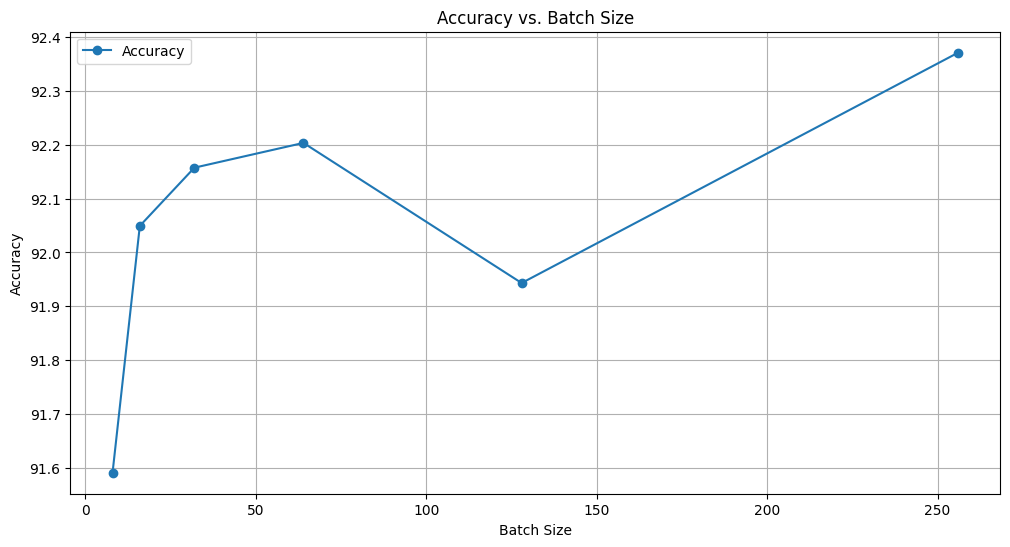

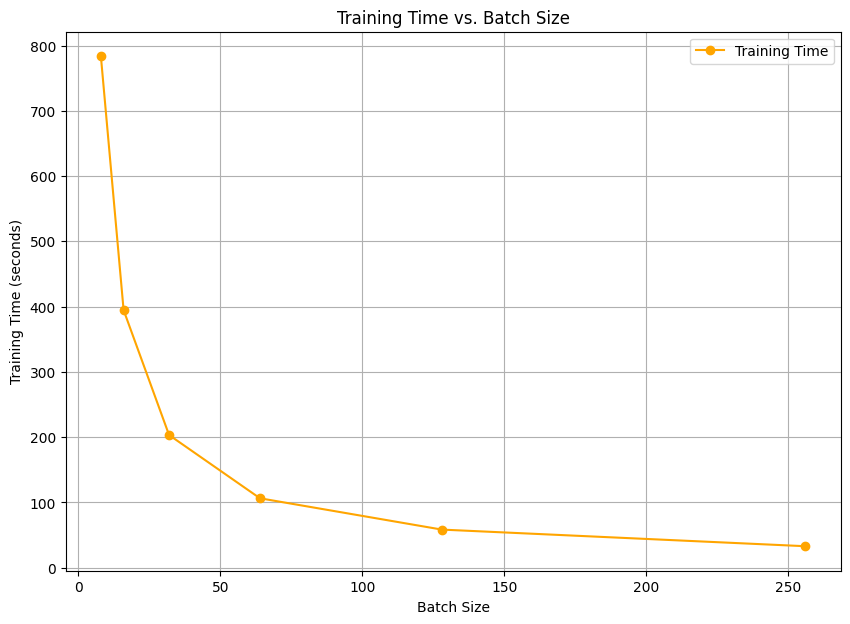

In [ ]:
# Results!
grid_search_over_batch_sizes()

The plots validate the expected trade-off between training time and testing accuracy. Based on our results, a mini-batch size of 64 emerged as the optimal choice, balancing both efficiency and performance effectively.

# Final Predictions - BiTran

Now that we tried to fine tune our model to the fullest, let's perform our experiment of interest on Limited Order Book Data (7 days train + 3 days test on multiple horizons k={10,20,50,100})

In [ ]:
# Data Retrieval
combined_data = import_data()

# Configuration
config = TrainingConfig(combined_data)

# We set the sequence length at 10 (common choice in LOB data experiences)
config.seq_len = 10
# Optimal batch size of 64
config.batch_size = 64

# Definition of the transformer model : We set the use_tape parameter to True
model = BiTranWrapper(
            input_dim=config.input_dim,
            seq_len=config.seq_len,
            num_classes=config.num_classes,
            use_tape=True,
            n_heads=8 # 8 heads
        ).to(config.device)

# Results time!
benchmark(combined_data, model, config,'BiTran')


Evaluating model with horizon: 10
The number of data points in the testing set is: 2563905


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 4 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 5 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 6 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 7 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 8 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 9 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 10 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 11 finished
Epoch [1/2]
Train Loss: 0.0048, Accuracy: 94.10%
Val Loss: 0.0047, Accuracy: 95.73%


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 4 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 5 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 6 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 7 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 8 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 9 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 10 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 11 finished
Epoch [2/2]
Train Loss: 0.0047, Accuracy: 94.39%
Val Loss: 0.0051, Accuracy: 94.26%
Model trained for horizon 10 saved to: /content/drive/My Drive/BiTran_10.pt

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished

Evaluation on chunk 2 finished

Evaluation on chunk 3 finished

Evaluation on chunk 4 finished

Evaluation on chunk 5 finished
Overall Accuracy: 94.86%
Overall F1 Score: 0.9490
Overall Recall: 0.9486
Overall Precision: 0.9496

Evaluating model with horizon: 20
The number of data points in the testing set is: 2563905


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 4 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 5 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 6 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 7 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 8 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 9 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 10 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 11 finished
Epoch [1/2]
Train Loss: 0.0038, Accuracy: 94.32%
Val Loss: 0.0035, Accuracy: 94.69%


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 4 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 5 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 6 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 7 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 8 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 9 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 10 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 11 finished
Epoch [2/2]
Train Loss: 0.0032, Accuracy: 95.56%
Val Loss: 0.0032, Accuracy: 95.23%
Model trained for horizon 20 saved to: /content/drive/My Drive/BiTran_20.pt

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished

Evaluation on chunk 2 finished

Evaluation on chunk 3 finished

Evaluation on chunk 4 finished

Evaluation on chunk 5 finished
Overall Accuracy: 93.52%
Overall F1 Score: 0.9343
Overall Recall: 0.9352
Overall Precision: 0.9348

Evaluating model with horizon: 50
The number of data points in the testing set is: 2563905


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 4 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 5 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 6 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 7 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 8 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 9 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 10 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 11 finished
Epoch [1/2]
Train Loss: 0.0030, Accuracy: 94.16%
Val Loss: 0.0048, Accuracy: 90.52%


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 4 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 5 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 6 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 7 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 8 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 9 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 10 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 11 finished
Epoch [2/2]
Train Loss: 0.0021, Accuracy: 96.13%
Val Loss: 0.0048, Accuracy: 89.75%
Model trained for horizon 50 saved to: /content/drive/My Drive/BiTran_50.pt

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished

Evaluation on chunk 2 finished

Evaluation on chunk 3 finished

Evaluation on chunk 4 finished

Evaluation on chunk 5 finished
Overall Accuracy: 88.89%
Overall F1 Score: 0.8863
Overall Recall: 0.8889
Overall Precision: 0.8906

Evaluating model with horizon: 100
The number of data points in the testing set is: 2563905


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 4 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 5 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 6 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 7 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 8 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 9 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 10 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 11 finished
Epoch [1/2]
Train Loss: 0.0027, Accuracy: 93.23%
Val Loss: 0.0046, Accuracy: 91.38%


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 0 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 1 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 2 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 3 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 4 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 5 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 6 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 7 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 8 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 9 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 10 finished


<ipython-input-16-c7c579f16c99>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float).to(config.device))



Training on chunk 11 finished
Epoch [2/2]
Train Loss: 0.0016, Accuracy: 96.00%
Val Loss: 0.0044, Accuracy: 92.55%
Model trained for horizon 100 saved to: /content/drive/My Drive/BiTran_100.pt

Evaluation on chunk 0 finished

Evaluation on chunk 1 finished

Evaluation on chunk 2 finished

Evaluation on chunk 3 finished

Evaluation on chunk 4 finished

Evaluation on chunk 5 finished
Overall Accuracy: 91.87%
Overall F1 Score: 0.9187
Overall Recall: 0.9187
Overall Precision: 0.9194

Final Results:
       loss   accuracy        f1    recall  precision  Horizon
0  0.004401  94.856251  0.948976  0.948563   0.949577       10
1  0.004133  93.522586  0.934300  0.935226   0.934796       20
2  0.004946  88.894612  0.886334  0.888946   0.890648       50
3  0.004653  91.866735  0.918713  0.918667   0.919380      100
Evaluation results saved to: /content/drive/My Drive/benchmark_bitran.csv
